In [1]:
import os

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graspy as gs

import sys
sys.path.append("../../multigraph/")

from experiment import MultiGraphCluster

/home/j1c/graphstats/venv/lib/python3.6/site-packages/graspy/plot/__init__.py:8: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  mpl.use('Agg')


In [2]:
fmri_path = '../../data/HNU1/fmri/desikan/'
fmris = os.listdir(fmri_path)

dmri_path = '../../data/HNU1/dwi/desikan/'
dmris = os.listdir(dmri_path)

df = pd.read_csv('../../data/HNU1/subject_data.csv')

In [3]:
dmri_graphs = []
fmri_graphs = []
labels = []

for idx, row in df.iterrows():
    dmri_file, fmri_file, label = row
    dmri_graphs.append(gs.utils.import_graph(np.load(dmri_path + dmri_file)))
    fmri_graphs.append(gs.utils.import_graph(np.load(fmri_path + fmri_file)))
    labels.append(label)

In [6]:
len(dmri_graphs)

274

## Multimodal, multigraph clustering

### HNU1 Dataset

Data summary
- subjects = 30
- total fmri scans = 274
- total dmri scans = 274
- total scans = 548

Desikan atlas
- num vertices = 70

## Without PTR

Running KMeans on vectorized graphs with 50 clusters.
Running graph embedding
Running cMDS
Running Gaussian Clustering with 50 clusters


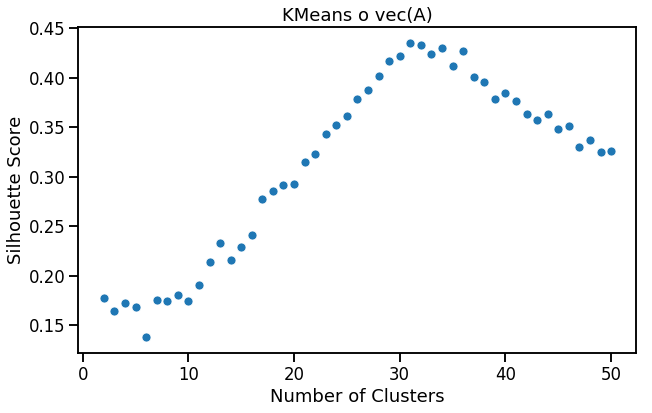

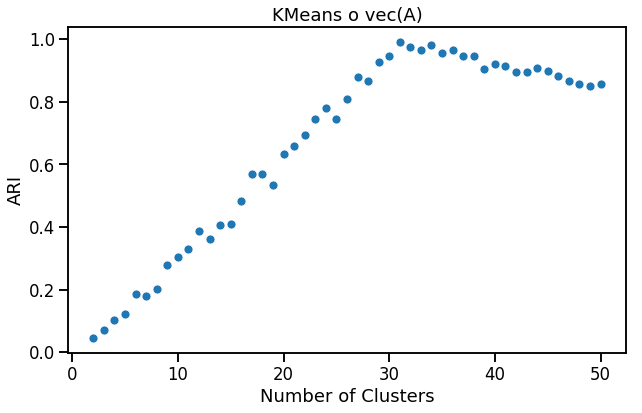

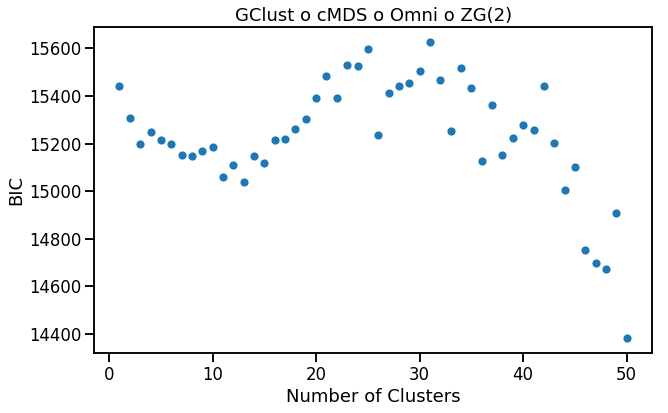

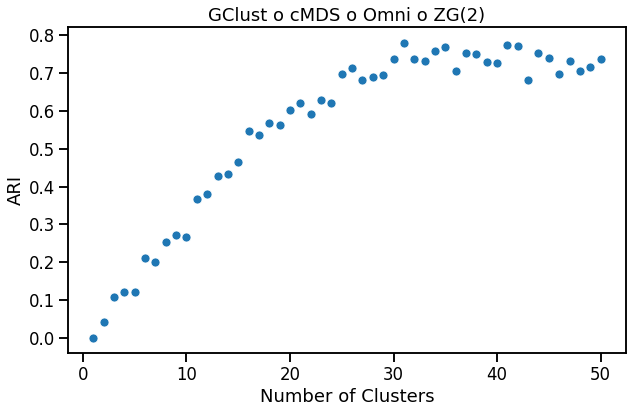

In [4]:
mgc = MultiGraphCluster(transform=None, omni_dimensions=50)
mgc.run_experiment(dmri_graphs, fmri_graphs, labels)

## WIth PTR

Running KMeans on vectorized graphs with 50 clusters.
Running graph embedding
Running cMDS
Running Gaussian Clustering with 50 clusters


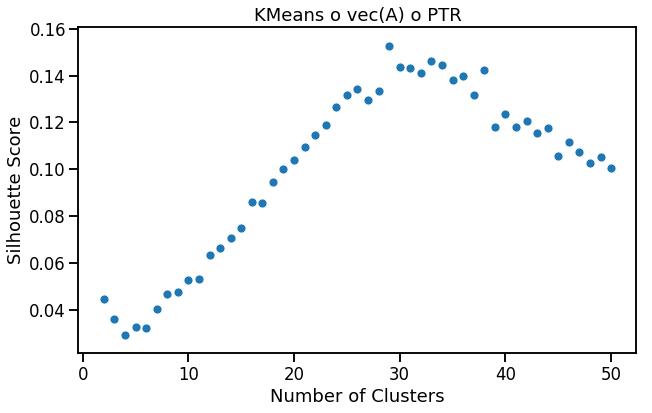

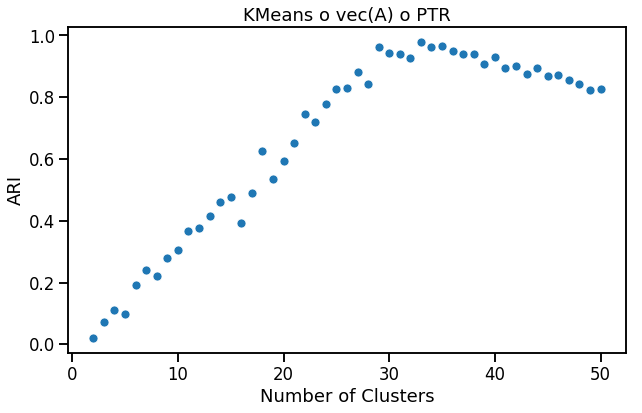

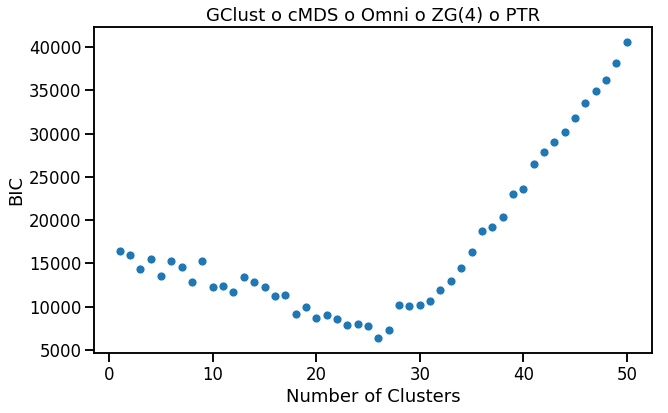

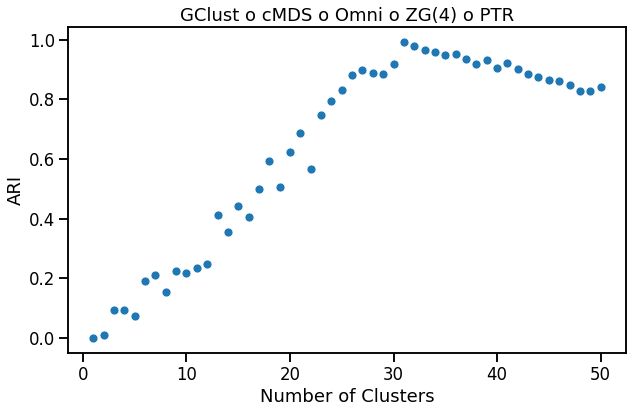

In [4]:
mgc = MultiGraphCluster(n_elbows=4, omni_dimensions=50, mds_dimensions=25)
mgc.run_experiment(dmri_graphs, fmri_graphs, labels)

### Running MGC on embeddings from cMDS and sex

In [5]:
from mgcpy.independence_tests.mgc.mgc import MGC

In [15]:
s = pd.Series(labels, dtype="category").cat.codes.values

mgc_independence = MGC(mgc.dhat_, s.reshape(-1, 1).astype(float), None)
pval, data = mgc_independence.p_value()

In [31]:
pval

0.0

In [34]:
data['test_statistic']

0.9418786

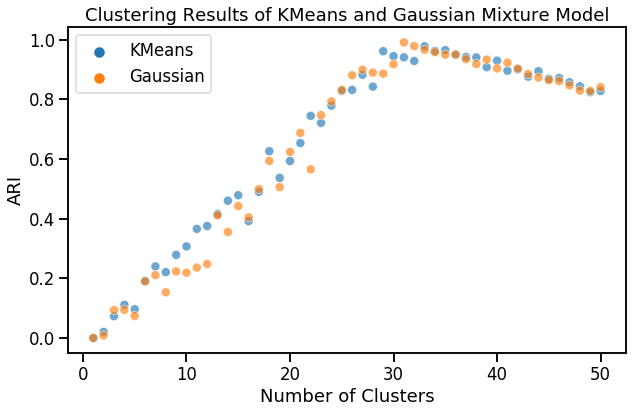

In [36]:
kclust_ari = [0] + mgc.kclust_ari_
gclust_ari = mgc.gclust_ari_
ari = np.hstack([kclust_ari, gclust_ari])
xrange = np.array(list(range(1, 51)) * 2)
labels = ['KMeans'] * 50 + ['Gaussian'] * 50

with sns.plotting_context("talk", font_scale=1):
    fig = plt.figure(figsize=(10, 6))
    plot = sns.scatterplot(x = xrange, y=ari, hue=labels, alpha=0.65)
    plot.set(xlabel='Number of Clusters', ylabel='ARI', title='Clustering Results of KMeans and Gaussian Mixture Model')